In [3]:
# test_glove.txt
glove_content = """
king 0.50 0.70 -0.60 0.10
queen 0.55 0.75 -0.65 0.12
man 0.40 0.50 -0.30 0.05
woman 0.45 0.55 -0.35 0.07
apple 0.90 0.10 0.05 -0.20
mango 0.88 0.12 0.08 -0.18
computer -0.50 -0.40 0.80 0.90
keyboard -0.55 -0.42 0.85 0.92
"""

In [2]:
import numpy as np 
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [5]:
glove2word2vec("datasets/test_glove.txt", "datasets/test_wv.txt")

/tmp/ipykernel_170378/3270431837.py:1: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec("datasets/test_glove.txt", "datasets/test_wv.txt")


(8, 4)

In [7]:
model = KeyedVectors.load_word2vec_format(
    "datasets/test_wv.txt", binary=False)

In [8]:
model

In [9]:
model.similarity('king','queen')

0.9998945

In [11]:
model.similarity('mango','apple')

0.99897045

In [12]:
model.similarity('computer','woman')

-0.61038744

In [14]:
model.similarity('computer','keyboard')

0.99967086

In [15]:
model.similarity('king','man')

0.9841422

In [16]:
# Analogy: King - Man + Woman = ?

In [17]:
model.most_similar(positive=['woman','king'], negative=['man'], topn=1)

[('queen', 0.9998007416725159)]

In [19]:
model.most_similar('keyboard')[0]

('computer', 0.9996708035469055)

In [20]:
model.doesnt_match(['mango','apple','computer'])

'computer'

#### Visualize

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [23]:
# Reduce the dimensions of these vectors to 2
pca = PCA(n_components=2,random_state=0)

In [38]:
model.index_to_key

['king', 'queen', 'man', 'woman', 'apple', 'mango', 'computer', 'keyboard']

In [36]:
vectors_2d = pca.fit_transform(model.vectors)

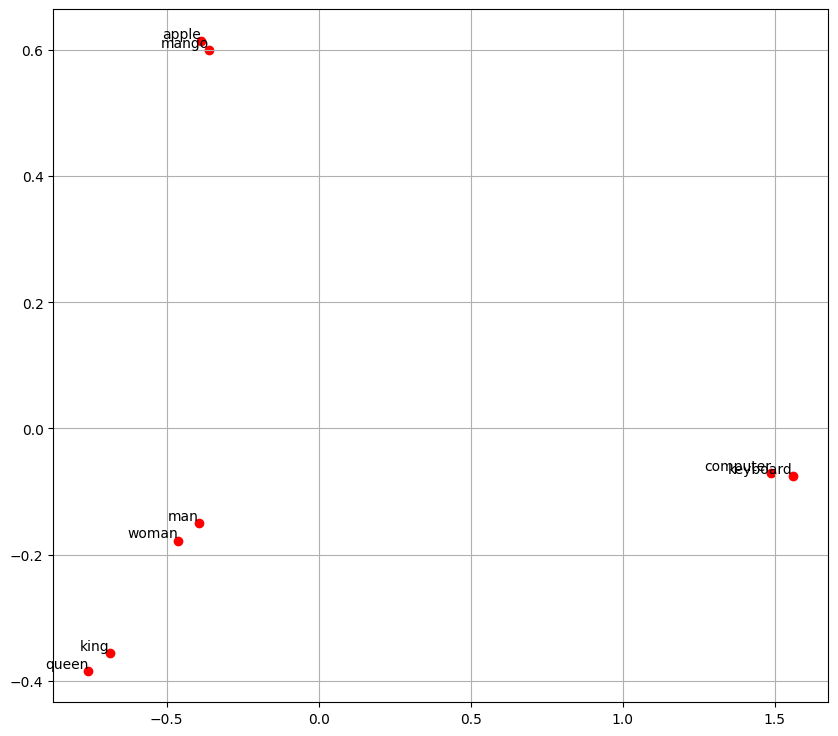

In [37]:
plt.figure(figsize=(10,9))
plt.scatter(vectors_2d[:,0], vectors_2d[:,1], color = 'r')
for i, word in enumerate(model.index_to_key):
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i,1]),
                ha='right',va='bottom')
plt.grid()